In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:/Users/samar/OneDrive/Desktop/stupid things 1/DSA/kmeans - kmeans_blobs - kmeans - kmeans_blobs.csv')


In [2]:

# Normalize the dataset
def normalize_data(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# K-means algorithm implementation
def kmeans(data, k, max_iters=100, tol=1e-4):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]  # Random initialization
    
    for _ in range(max_iters):
        # Assign points to the nearest centroid
        distances = np.array([euclidean_distance(data, centroid) for centroid in centroids]).T
        cluster_labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return cluster_labels, centroids


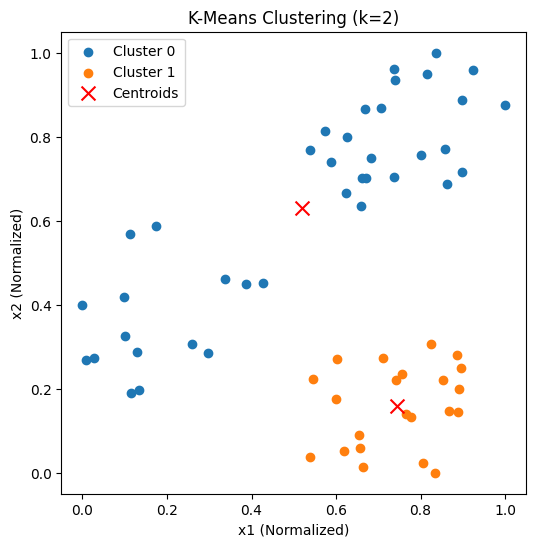

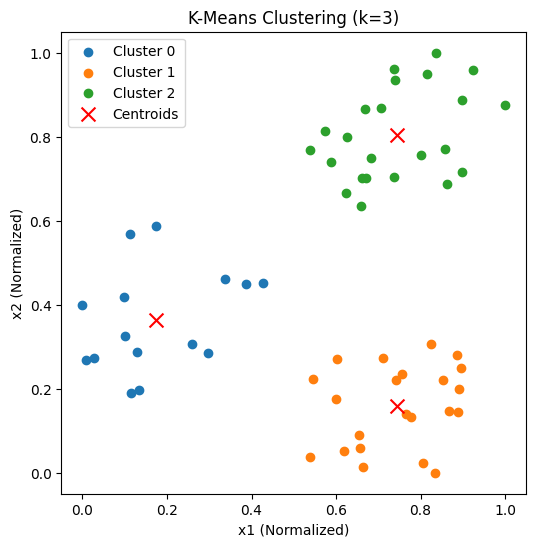

In [3]:

# Convert dataframe to numpy array and normalize
data = normalize_data(df.to_numpy())

# Run K-Means for k=2 and k=3
for k in [2, 3]:
    cluster_labels, centroids = kmeans(data, k)
    
    # Plot the clusters
    plt.figure(figsize=(6, 6))
    for i in range(k):
        plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('x1 (Normalized)')
    plt.ylabel('x2 (Normalized)')
    plt.legend()
    plt.show()
